<a href="https://colab.research.google.com/github/neelimareddyb/Handwritten-Digit-Classification/blob/main/Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

# Importing the MNIST Dataset
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"Training Data Shape: {X_train.shape}")
print(f"Test Data Shape: {X_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training Data Shape: (60000, 28, 28)
Test Data Shape: (10000, 28, 28)


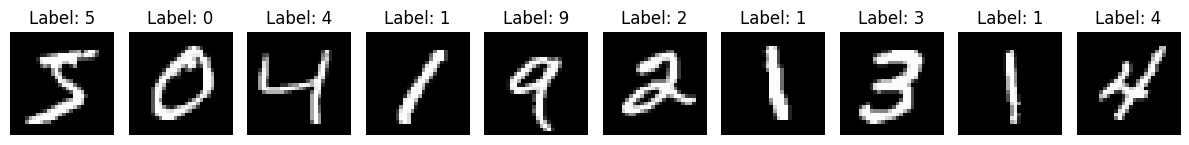

In [2]:
plt.figure(figsize=(12,4))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [3]:
# Reshape for CNN (Samples, Height, Width, Channels)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# Scaling pixel values (0-255 -> 0-1)
X_train /= 255
X_test /= 255

# One-Hot Encoding labels (e.g., 3 -> [0,0,0,1,0,...])
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

print("Preprocessing complete.")

Preprocessing complete.


In [4]:
model = Sequential()

# Feature Extraction
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Classification Layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5)) # Increased dropout for better generalization
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,380,938 (9.08 MB)

 Trainable params: 2,380,938 (9.08 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Training (Note: 50 epochs is a lot, early_stop will likely trigger much sooner)
history = model.fit(
    X_train, y_cat_train,
    epochs=15,
    validation_data=(X_test, y_cat_test),
    callbacks=[early_stop]
)

model.save('mnist_model.h5')
print("\nModel saved as mnist_model.h5")

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9028 - loss: 0.3106 - val_accuracy: 0.9872 - val_loss: 0.0407
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9806 - loss: 0.0650 - val_accuracy: 0.9910 - val_loss: 0.0284
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9869 - loss: 0.0441 - val_accuracy: 0.9914 - val_loss: 0.0272
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9890 - loss: 0.0331 - val_accuracy: 0.9914 - val_loss: 0.0254
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9912 - loss: 0.0271 - val_accuracy: 0.9921 - val_loss: 0.0265
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9934 - loss: 0.0213 - val_accuracy: 0.9914 - val_loss: 0.0277
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9932 - loss: 0.0203 - val_accuracy: 0.9913 - val_loss: 0.0288



Model saved as mnist_model.h5


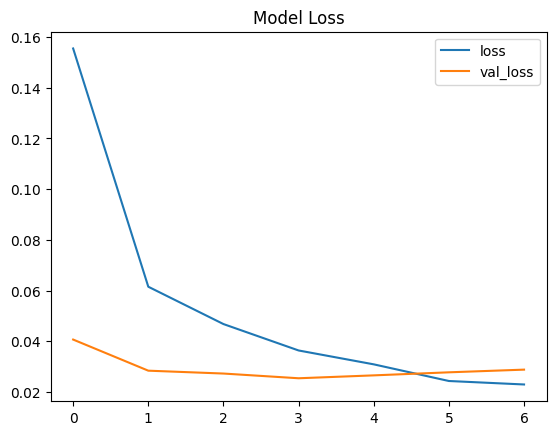

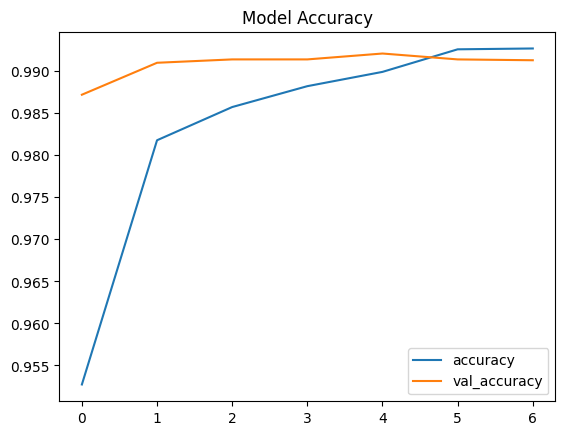

In [6]:
metrics = pd.DataFrame(model.history.history)

# Plot Loss
metrics[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.show()

# Plot Accuracy
metrics[['accuracy', 'val_accuracy']].plot()
plt.title('Model Accuracy')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



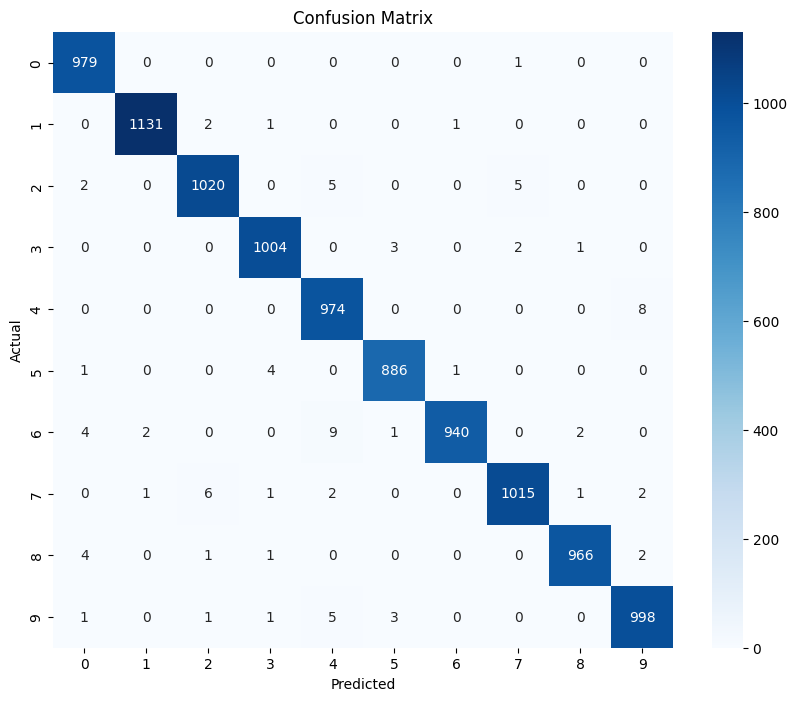

In [7]:
predictions = np.argmax(model.predict(X_test), axis=-1)

print("Classification Report:\n")
print(classification_report(y_test, predictions))

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
Actual Label: 4
Model Prediction: 4


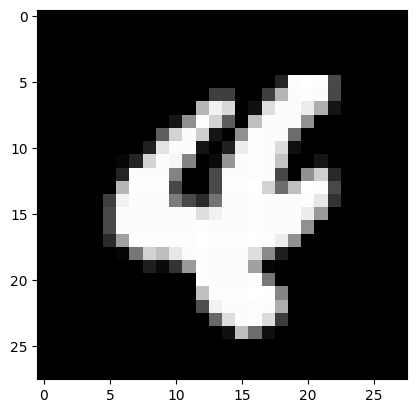

In [8]:
# Grab a random image from the test set
index = 95
test_img = X_test[index]
plt.imshow(test_img.reshape(28,28), cmap='gray')

# Make prediction
pred = model.predict(test_img.reshape(1, 28, 28, 1))
print(f"Actual Label: {y_test[index]}")
print(f"Model Prediction: {np.argmax(pred)}")